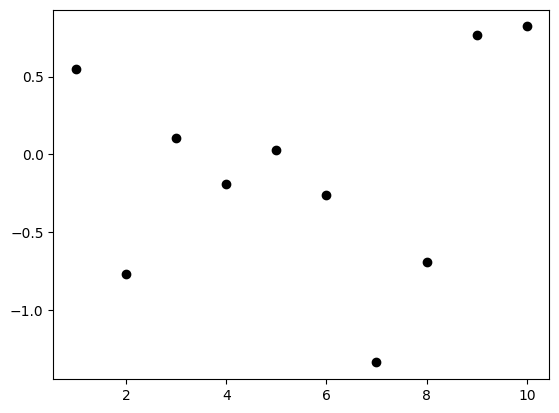

In [9]:
import numpy as np
import matplotlib.pyplot as plt

k = 10 # number of arms
n_bandits = 2000 # number of bandits
time_steps = 1000 #
mu, sigma = 0, 1 # mean, standard deviation

reward_dist = np.random.normal(mu, sigma, k)

# plotting the random rewards
x_vals = range(1,k+1)
plt.plot(x_vals, reward_dist, 'o', color='black')
plt.show()


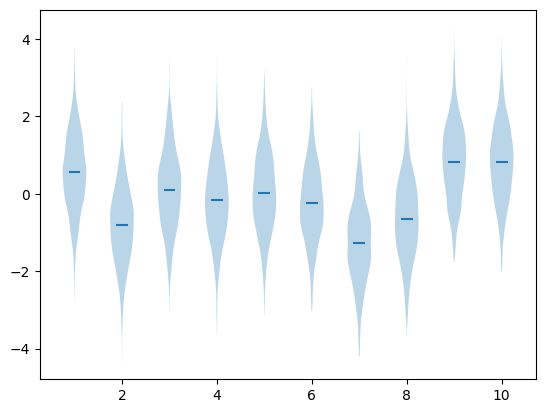

In [10]:
rewards_dist = [np.random.normal(r, sigma, time_steps) for r in reward_dist]

# plotting the distribution graphs
plt.violinplot(rewards_dist, showextrema=False, showmeans=True)
plt.show()

Running experiment for epsilon: 0 and time step:  2
Running experiment for epsilon: 0 and time step:  3
Running experiment for epsilon: 0 and time step:  4
Running experiment for epsilon: 0 and time step:  5
Running experiment for epsilon: 0 and time step:  6
Running experiment for epsilon: 0 and time step:  7
Running experiment for epsilon: 0 and time step:  8
Running experiment for epsilon: 0 and time step:  9
Running experiment for epsilon: 0 and time step:  10
Running experiment for epsilon: 0 and time step:  11
Running experiment for epsilon: 0 and time step:  12
Running experiment for epsilon: 0 and time step:  13
Running experiment for epsilon: 0 and time step:  14
Running experiment for epsilon: 0 and time step:  15
Running experiment for epsilon: 0 and time step:  16
Running experiment for epsilon: 0 and time step:  17
Running experiment for epsilon: 0 and time step:  18
Running experiment for epsilon: 0 and time step:  19
Running experiment for epsilon: 0 and time step:  20
R

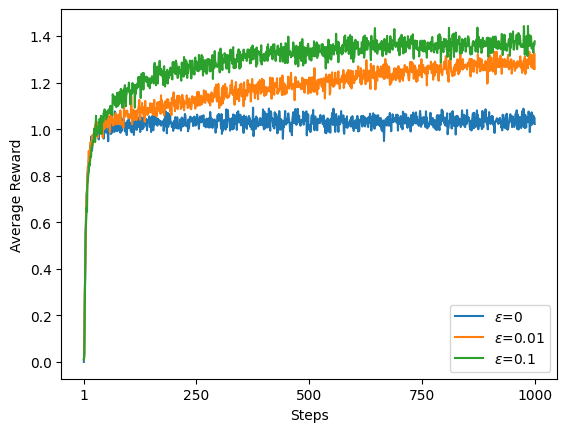

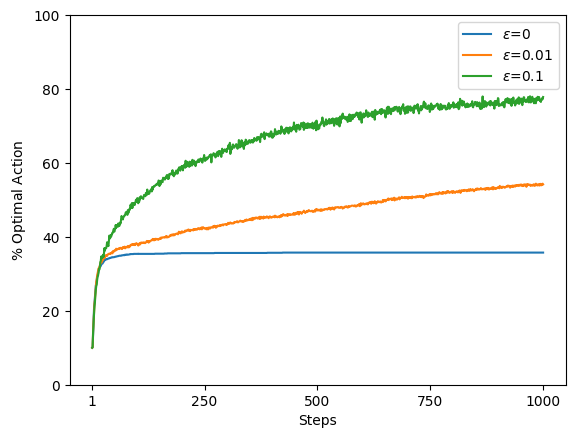

In [17]:
import numpy as np
import matplotlib.pyplot as plt

k = 10 # number of arms
n_bandits = 2000 # number of bandits
time_steps = 1000 #
mu, sigma = 0, 1 # mean, standard deviation

# True action values
Q_true = np.random.normal(mu,sigma, (n_bandits, k))
opt_action = np.argmax(Q_true, 1) # optimal action

# for plotting
reward_graph = plt.figure(1).gca()
action_graph = plt.figure(2).gca()
x_vals = range(1, time_steps+1) # x axis values
x_ticks = [1, 250, 500, 750, 1000]

# epsilon-greedy algorithm
epsilon = [0, 0.01, 0.1]
for ep in epsilon:
    average_rewards = [] # average rewards for this episode
    opt_action_list = [] # list of % of opt action taken

    # time step 0
    Q_vals = np.zeros((n_bandits, k))
    # average_rewards.append(0) # We are not plotting for time step 0
    # opt_action_list.append(0) # We are not plotting for time step 0

    # time step 1 (Each arm is pulled once)
    N_vals = np.ones((n_bandits, k))
    Q_init = np.random.normal(Q_true, sigma) # get the rewards
    average_rewards.append(np.mean(Q_init))
    opt_action_list.append(10) # 10% time optimal action is taken

    # time step 2-1000
    for t in range(2,time_steps+1):
        print("Running experiment for epsilon:", ep, "and time step: ", t)
        step_rewards = [] # rewards for this time step
        opt_action_taken = 0 # number of opt action taken in this time step
        for i in range(n_bandits): # for each bandit 
            if np.random.random() < ep:
                A = np.random.randint(k) # random action
            else:
                A = np.argmax(Q_vals[i]) # greedy action
            R = np.random.normal(Q_true[i][A], sigma) # Get the reward
            step_rewards.append(R) # add it to rewards for this time step
            N_vals[i][A] += 1 # update the number of actions taken
            Q_vals[i][A] += (R-Q_vals[i][A])/N_vals[i][A] # update the Q values
            if A == opt_action[i]: # if the optimal action is taken
                opt_action_taken += 1
        step_average_reward = np.mean(step_rewards)
        average_rewards.append(step_average_reward)
        opt_action_percentage = opt_action_taken * 100 / n_bandits
        opt_action_list.append(opt_action_percentage)
    reward_graph.plot(x_vals, average_rewards)
    action_graph.plot(x_vals, opt_action_list)

# labels and legends for the plots
reward_graph.set_ylabel('Average Reward')
reward_graph.set_xlabel('Steps')
reward_graph.set_xticks(x_ticks)   
reward_graph.legend((r'$\epsilon$='+str(epsilon[0]), r'$\epsilon$='+str(epsilon[1]), r'$\epsilon$='+str(epsilon[2])), loc='best')
action_graph.set_ylabel(r'$\%$ Optimal Action')
action_graph.set_xlabel('Steps')
action_graph.set_xticks(x_ticks)
action_graph.set_ylim(0,100)
action_graph.legend((r'$\epsilon$='+str(epsilon[0]), r'$\epsilon$='+str(epsilon[1]), r'$\epsilon$='+str(epsilon[2])), loc='best')
plt.show()

Running time step  2 for  sample_average
Running time step  3 for  sample_average
Running time step  4 for  sample_average
Running time step  5 for  sample_average
Running time step  6 for  sample_average
Running time step  7 for  sample_average
Running time step  8 for  sample_average
Running time step  9 for  sample_average
Running time step  10 for  sample_average
Running time step  11 for  sample_average
Running time step  12 for  sample_average
Running time step  13 for  sample_average
Running time step  14 for  sample_average
Running time step  15 for  sample_average
Running time step  16 for  sample_average
Running time step  17 for  sample_average
Running time step  18 for  sample_average
Running time step  19 for  sample_average
Running time step  20 for  sample_average
Running time step  21 for  sample_average
Running time step  22 for  sample_average
Running time step  23 for  sample_average
Running time step  24 for  sample_average
Running time step  25 for  sample_average


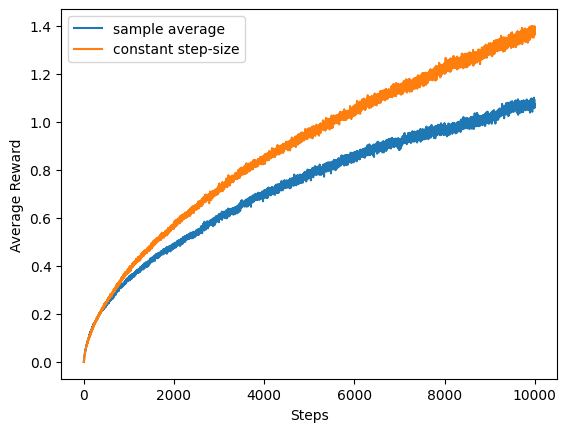

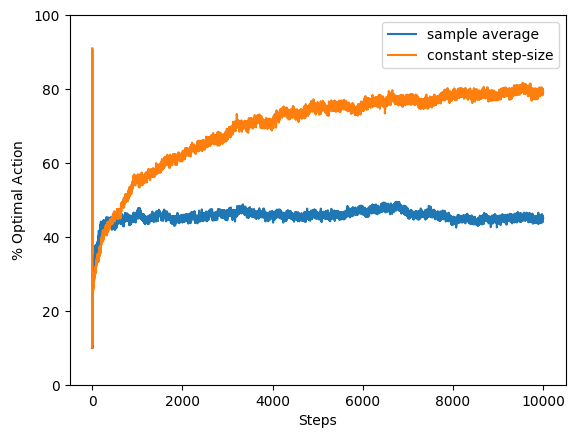

In [25]:
# Exercise 2.5
import matplotlib.pyplot as plt
import numpy as np

k = 10 # number of arms
time_steps = 10000 
n_bandits = 2000
mu, sigma = 0, 0.01 # mean, standard deviation

# for plotting
reward_graph = plt.figure(1).gca()
action_graph = plt.figure(2).gca()
x_vals = range(1,time_steps+1)

ep = 0.1
experiment = ['sample_average', 'constant_step_size']
for exp in experiment:
    average_rewards = [] # list of average rewards for the time steps
    opt_action_list = [] # list of optimal action taken

    # True values
    Q_true = np.zeros((n_bandits, k)) # All the q*(a) start out equal which is zero
    opt_action = np.argmax(Q_true, 1) # Initially, optimal action is any action

    # time step 0
    Q_values = np.zeros((n_bandits, k)) # Initially, all Q values are zeros
    
    # step 1
    N_values = np.ones((n_bandits, k)) # number of actions taken, each action is taken once
    average_rewards.append(0) # rewards after step 1
    opt_action_list.append(10)

    for t in range(2, time_steps+1):
        print("Running time step ", t, "for ", exp)
        step_rewards = [] # rewards for this time step
        opt_action_taken = 0 # how many times optimal action is taken
        for i in range(n_bandits):
            if np.random.random() < ep:
                A = np.random.randint(k)
            else:
                A = np.argmax(Q_values[i])
            R = np.random.normal(Q_true[i][A], sigma)
            step_rewards.append(R)
            alpha = 1/N_values[i][A] if (exp == 'sample_average') else 0.1
            Q_values[i][A] += alpha * (R - Q_values[i][A])
            N_values[i][A] += 1
            if (A == opt_action[i]):
                opt_action_taken += 1
        step_average_reward = np.mean(step_rewards)
        average_rewards.append(step_average_reward)
        opt_action_percentage = opt_action_taken * 100 / n_bandits
        opt_action_list.append(opt_action_percentage)
        # Most important, update the true values
        Q_true += np.random.normal(mu, sigma, (n_bandits, k))
        opt_action = np.argmax(Q_true, 1)
    reward_graph.plot(x_vals, average_rewards)
    action_graph.plot(x_vals, opt_action_list)

# labels and legends for the plots
reward_graph.set_ylabel('Average Reward')
reward_graph.set_xlabel('Steps')    
reward_graph.legend((r'sample average', r'constant step-size'), loc='best')
action_graph.set_ylabel(r'$\%$ Optimal Action')
action_graph.set_xlabel('Steps')
action_graph.set_ylim(0,100)
action_graph.legend((r'sample average', r'constant step-size'), loc='best')
plt.show()


TypeError: 'float' object is not subscriptable

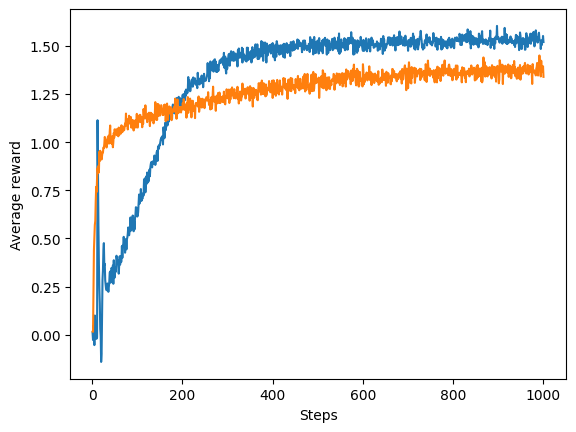

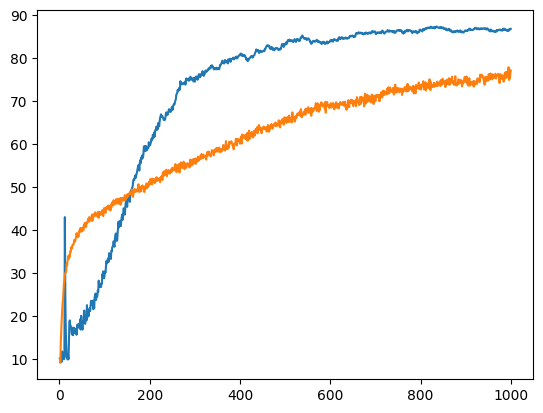

In [32]:
import matplotlib.pyplot as plt
import numpy as np

k = 10
n_bandits = 2000
time_steps = 1000
mu, sigma = 0, 1 # mean, standard deviation

# for plotting
reward_graph = plt.figure(1).gca()
action_graph = plt.figure(2).gca()
x_vals = range(1,time_steps+1)

# stationary true values
Q_true = np.random.normal(mu, sigma, (n_bandits, k))
opt_actions = np.argmax(Q_true, 1)
alpha = 0.1

epsilon = [0, 0.1]
for ep in epsilon:
    average_rewards = []
    opt_action_list = []

    # step 0
    Q_values = np.ones((n_bandits, k))*5 if (ep==0) else np.zeros((n_bandits, k))

    # step 1
    N_values = np.ones((n_bandits, k))
    Q_init = np.random.normal(Q_true, sigma)
    average_rewards.append(np.mean(Q_init))
    opt_action_list.append(10) # 10% optimal action taken

    for t in range(2, time_steps+1):
        step_rewards = []
        opt_action_taken = 0
        for i in range(n_bandits):
            if np.random.random() < ep:
                A = np.random.randint(k)
            else:
                A = np.argmax(Q_values[i])
            if (A == opt_actions[i]):
                opt_action_taken += 1
            R = np.random.normal(Q_true[i][A], sigma)
            step_rewards.append(R)
            N_values[i][A] += 1
            Q_values[i][A] += (R - Q_values[i][A])*alpha
        step_average = np.mean(step_rewards)
        opt_action_percentage = opt_action_taken * 100 / n_bandits
        average_rewards.append(step_average)
        opt_action_list.append(opt_action_percentage)
    reward_graph.plot(x_vals, average_rewards)
    action_graph.plot(x_vals, opt_action_list)

# setting up the figures
reward_graph.set_xlabel("Steps")
reward_graph.set_ylabel("Average reward")
reward_graph.legend((r'Optimistic, greedy, $Q_1 = 5, \epsilon =$'+str(epsilon[0]), r'Realistic $\epsilon$-greedy,$Q_1 = 0, \epsilon =$'+str(epsilon[1])))
action_graph.set_xlabel("Steps")
action_graph.set_ylabel("% Optimal action")
action_graph.set_ylim(0,100)
action_graph.legend((r'Optimistic, greedy, $Q_1 = 5, \epsilon =$'+str(epsilon[0]), r'Realistic $\epsilon$-greedy,$Q_1 = 0, \epsilon =$'+str(epsilon[1])))
plt.show()

Running step  2 of sample-average method with ep  0
Running step  3 of sample-average method with ep  0
Running step  4 of sample-average method with ep  0
Running step  5 of sample-average method with ep  0
Running step  6 of sample-average method with ep  0
Running step  7 of sample-average method with ep  0
Running step  8 of sample-average method with ep  0
Running step  9 of sample-average method with ep  0
Running step  10 of sample-average method with ep  0
Running step  11 of sample-average method with ep  0
Running step  12 of sample-average method with ep  0
Running step  13 of sample-average method with ep  0
Running step  14 of sample-average method with ep  0
Running step  15 of sample-average method with ep  0
Running step  16 of sample-average method with ep  0
Running step  17 of sample-average method with ep  0
Running step  18 of sample-average method with ep  0
Running step  19 of sample-average method with ep  0
Running step  20 of sample-average method with ep  0
R

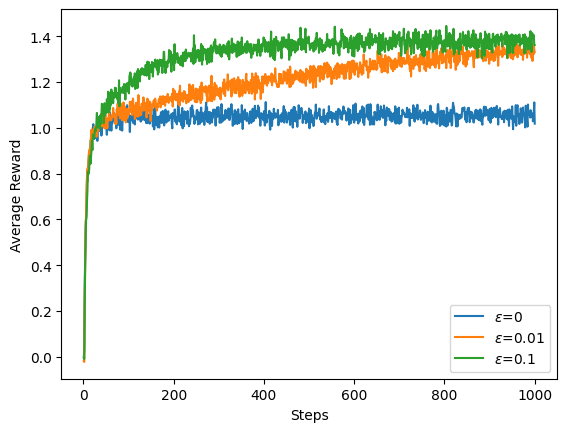

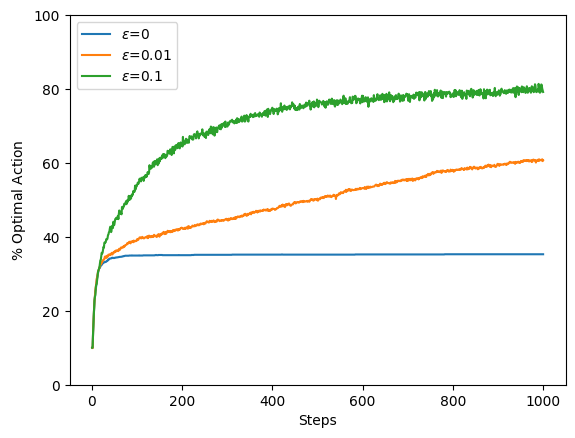

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

k = 10
n_bandits = 2000
time_steps = 1000
mu, sigma = 0, 1

# for plotting graphs
reward_graph = plt.figure(1).gca()
action_graph = plt.figure(2).gca()
x_vals = range(1, time_steps+1)

# true values
Q_star = np.random.normal(mu, sigma, (n_bandits, k))
A_opt = np.argmax(Q_star, 1)

epsilon = [0, 0.01, 0.1]
for ep in epsilon:
    avg_rewards = []
    opt_act_percentage = []

    # time step 0
    Q = np.zeros((n_bandits, k))
    N = np.zeros((n_bandits, k))
    # avg_rewards.append(0)
    # opt_act_percentage.append(0)

    # time step 1 (each arm is pulled once)
    Q1 = np.random.normal(Q_star, sigma)
    # Q = Q1
    N += 1 # arms pulled once
    avg_rewards.append(np.mean(Q1))
    opt_act_percentage.append(1/k*100) # 10% time optimal action is pulled

    # time step 2-1000
    for t in range(2,time_steps+1):
        print("Running step ", t, "of sample-average method with ep ", ep)
        step_rewards = []
        opt_action_taken = 0
        for i in range(n_bandits):
            if (np.random.random() < ep):
                A = np.random.randint(k)
            else:
                A = np.argmax(Q[i])
            R = np.random.normal(Q_star[i][A], sigma)
            step_rewards.append(R)
            Q[i][A] = Q[i][A] + (R-Q[i][A])/N[i][A]
            N[i][A] += 1
            if (A == A_opt[i]):
                opt_action_taken += 1
        step_average = np.mean(step_rewards)
        avg_rewards.append(step_average)
        opt_act_ratio = opt_action_taken / n_bandits * 100
        opt_act_percentage.append(opt_act_ratio)
    # plot the graphs
    reward_graph.plot(x_vals, avg_rewards)
    action_graph.plot(x_vals, opt_act_percentage)

# labels and legends for the plots
reward_graph.set_ylabel('Average Reward')
reward_graph.set_xlabel('Steps')
reward_graph.legend((r'$\epsilon$='+str(epsilon[0]), r'$\epsilon$='+str(epsilon[1]), r'$\epsilon$='+str(epsilon[2])), loc='best')
action_graph.set_ylabel(r'$\%$ Optimal Action')
action_graph.set_xlabel('Steps')
action_graph.set_ylim(0,100)
action_graph.legend((r'$\epsilon$='+str(epsilon[0]), r'$\epsilon$='+str(epsilon[1]), r'$\epsilon$='+str(epsilon[2])), loc='best')
plt.show()

Running step 2 for experiment sample averages with epsilon 0.1
Running step 3 for experiment sample averages with epsilon 0.1
Running step 4 for experiment sample averages with epsilon 0.1
Running step 5 for experiment sample averages with epsilon 0.1
Running step 6 for experiment sample averages with epsilon 0.1
Running step 7 for experiment sample averages with epsilon 0.1
Running step 8 for experiment sample averages with epsilon 0.1
Running step 9 for experiment sample averages with epsilon 0.1
Running step 10 for experiment sample averages with epsilon 0.1
Running step 11 for experiment sample averages with epsilon 0.1
Running step 12 for experiment sample averages with epsilon 0.1
Running step 13 for experiment sample averages with epsilon 0.1
Running step 14 for experiment sample averages with epsilon 0.1
Running step 15 for experiment sample averages with epsilon 0.1
Running step 16 for experiment sample averages with epsilon 0.1
Running step 17 for experiment sample averages w

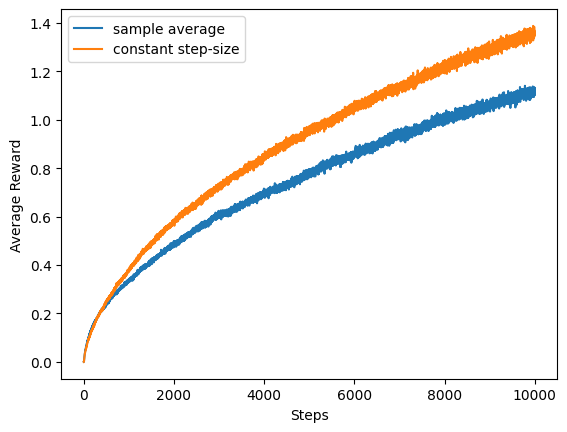

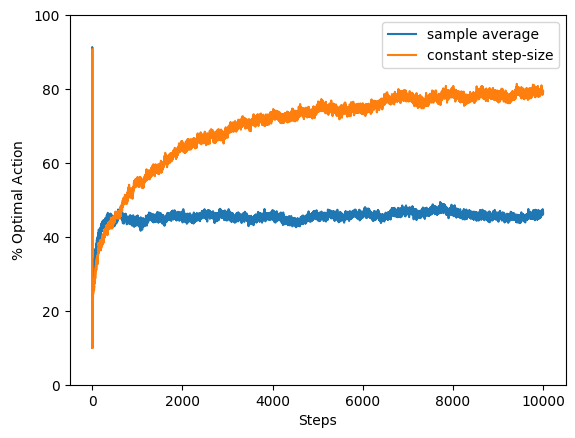

In [10]:
# exercise 2.5
import numpy as np 
import matplotlib.pyplot as plt

k = 10
n_bandits = 2000
time_steps = 10000
mu, sigma = 0, 0.01

# for plotting graphs
reward_graph = plt.figure(1).gca()
action_graph = plt.figure(2).gca()
x_vals = range(1, time_steps+1)

epsilon = 0.1
experiments = ['sample averages', 'constant step-size']
for exp in experiments:

    # true values
    Q_star = np.zeros((n_bandits, k))
    A_opt = np.argmax(Q_star, 1)

    rewards = []
    act_percents = []

    # step 0
    Q = np.zeros((n_bandits, k))
    N = np.zeros((n_bandits, k))    

    # step 1
    N += 1
    Q_i = np.random.normal(Q_star, sigma)
    rewards.append(np.mean(Q_i))
    act_percents.append(10)

    # step 2-1000
    for t in range(2, time_steps+1):
        print("Running step", t, "for experiment", exp, "with epsilon", epsilon)
        step_rewards = []
        opt_act_taken = 0
        for i in range(n_bandits):
            if (np.random.random() < epsilon):
                A = np.random.randint(k)
            else:
                A = np.argmax(Q[i])
            R = np.random.normal(Q_star[i][A], sigma)
            step_rewards.append(R)
            alpha = 1/N[i][A] if (exp == 'sample averages') else 0.1
            Q[i][A] = Q[i][A] + (R-Q[i][A]) * alpha
            N[i][A] += 1
            if (A==A_opt[i]):
                opt_act_taken += 1
        # Random walk
        Q_star += np.random.normal(mu, sigma, (n_bandits, k))
        A_opt = np.argmax(Q_star, 1)
        step_avg = np.mean(step_rewards)
        rewards.append(step_avg)
        opt_act_per = opt_act_taken / n_bandits * 100
        act_percents.append(opt_act_per)
    # plot the graphs
    reward_graph.plot(x_vals, rewards)
    action_graph.plot(x_vals, act_percents)

# labels and legends for the plots
reward_graph.set_ylabel('Average Reward')
reward_graph.set_xlabel('Steps')    
reward_graph.legend((r'sample average', r'constant step-size'), loc='best')
action_graph.set_ylabel(r'$\%$ Optimal Action')
action_graph.set_xlabel('Steps')
action_graph.set_ylim(0,100)
action_graph.legend((r'sample average', r'constant step-size'), loc='best')
plt.show()
    

Running step  2 of sample-average method with ep  0
Running step  3 of sample-average method with ep  0
Running step  4 of sample-average method with ep  0
Running step  5 of sample-average method with ep  0
Running step  6 of sample-average method with ep  0
Running step  7 of sample-average method with ep  0
Running step  8 of sample-average method with ep  0
Running step  9 of sample-average method with ep  0
Running step  10 of sample-average method with ep  0
Running step  11 of sample-average method with ep  0
Running step  12 of sample-average method with ep  0
Running step  13 of sample-average method with ep  0
Running step  14 of sample-average method with ep  0
Running step  15 of sample-average method with ep  0
Running step  16 of sample-average method with ep  0
Running step  17 of sample-average method with ep  0
Running step  18 of sample-average method with ep  0
Running step  19 of sample-average method with ep  0
Running step  20 of sample-average method with ep  0
R

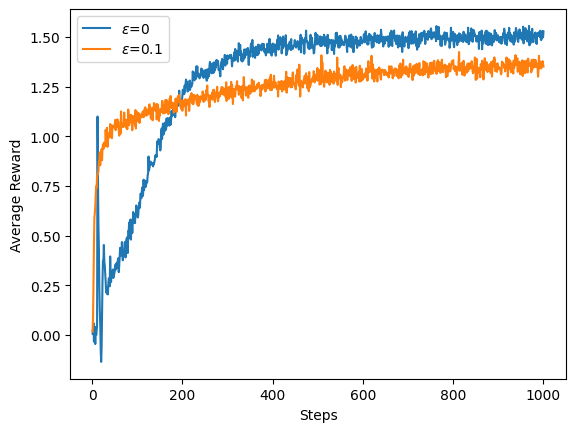

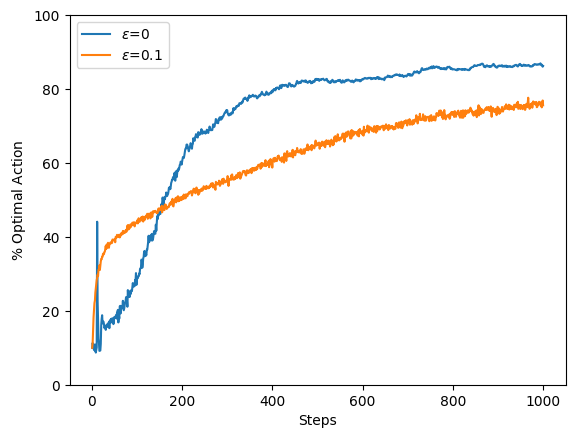

In [14]:
import numpy as np 
import matplotlib.pyplot as plt

k = 10
n_bandits = 2000
time_steps = 1000
mu, sigma = 0, 1

# for plotting graphs
reward_graph = plt.figure(1).gca()
action_graph = plt.figure(2).gca()
x_vals = range(1, time_steps+1)

# true values
Q_star = np.random.normal(mu, sigma, (n_bandits, k))
A_opt = np.argmax(Q_star, 1)

epsilon = [0, 0.1]
for ep in epsilon:
    avg_rewards = []
    opt_act_percentage = []

    # time step 0
    Q = np.zeros((n_bandits, k))
    if (ep==0):
        Q += 5
    N = np.zeros((n_bandits, k))
    # avg_rewards.append(0)
    # opt_act_percentage.append(0)

    # time step 1 (each arm is pulled once)
    Q1 = np.random.normal(Q_star, sigma)
    # Q = Q1
    N += 1 # arms pulled once
    avg_rewards.append(np.mean(Q1))
    opt_act_percentage.append(1/k*100) # 10% time optimal action is pulled

    # time step 2-1000
    for t in range(2,time_steps+1):
        print("Running step ", t, "of sample-average method with ep ", ep)
        step_rewards = []
        opt_action_taken = 0
        for i in range(n_bandits):
            if (np.random.random() < ep):
                A = np.random.randint(k)
            else:
                A = np.argmax(Q[i])
            R = np.random.normal(Q_star[i][A], sigma)
            step_rewards.append(R)
            Q[i][A] = Q[i][A] + (R-Q[i][A])*0.1
            N[i][A] += 1
            if (A == A_opt[i]):
                opt_action_taken += 1
        step_average = np.mean(step_rewards)
        avg_rewards.append(step_average)
        opt_act_ratio = opt_action_taken / n_bandits * 100
        opt_act_percentage.append(opt_act_ratio)
    # plot the graphs
    reward_graph.plot(x_vals, avg_rewards)
    action_graph.plot(x_vals, opt_act_percentage)

# labels and legends for the plots
reward_graph.set_ylabel('Average Reward')
reward_graph.set_xlabel('Steps')
reward_graph.legend((r'$\epsilon$='+str(epsilon[0]), r'$\epsilon$='+str(epsilon[1])), loc='best')
action_graph.set_ylabel(r'$\%$ Optimal Action')
action_graph.set_xlabel('Steps')
action_graph.set_ylim(0,100)
action_graph.legend((r'$\epsilon$='+str(epsilon[0]), r'$\epsilon$='+str(epsilon[1])), loc='best')
plt.show()

Running step  1 of sample-average method with ep  0
Running step  2 of sample-average method with ep  0
Running step  3 of sample-average method with ep  0
Running step  4 of sample-average method with ep  0
Running step  5 of sample-average method with ep  0
Running step  6 of sample-average method with ep  0
Running step  7 of sample-average method with ep  0


C:\Users\jahid\AppData\Local\Temp\ipykernel_5412\433755359.py:51: RuntimeWarning: invalid value encountered in divide
  A = np.argmax(Q[i] + 2 * np.sqrt(np.log(t)/N[i]))
C:\Users\jahid\AppData\Local\Temp\ipykernel_5412\433755359.py:51: RuntimeWarning: divide by zero encountered in divide
  A = np.argmax(Q[i] + 2 * np.sqrt(np.log(t)/N[i]))


Running step  8 of sample-average method with ep  0
Running step  9 of sample-average method with ep  0
Running step  10 of sample-average method with ep  0
Running step  11 of sample-average method with ep  0
Running step  12 of sample-average method with ep  0
Running step  13 of sample-average method with ep  0
Running step  14 of sample-average method with ep  0
Running step  15 of sample-average method with ep  0
Running step  16 of sample-average method with ep  0
Running step  17 of sample-average method with ep  0
Running step  18 of sample-average method with ep  0
Running step  19 of sample-average method with ep  0
Running step  20 of sample-average method with ep  0
Running step  21 of sample-average method with ep  0
Running step  22 of sample-average method with ep  0
Running step  23 of sample-average method with ep  0
Running step  24 of sample-average method with ep  0
Running step  25 of sample-average method with ep  0
Running step  26 of sample-average method with e

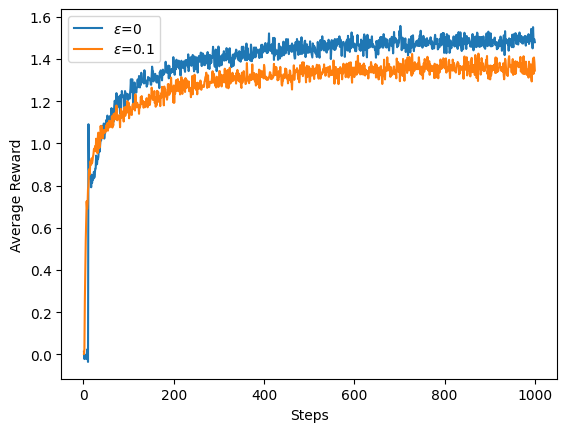

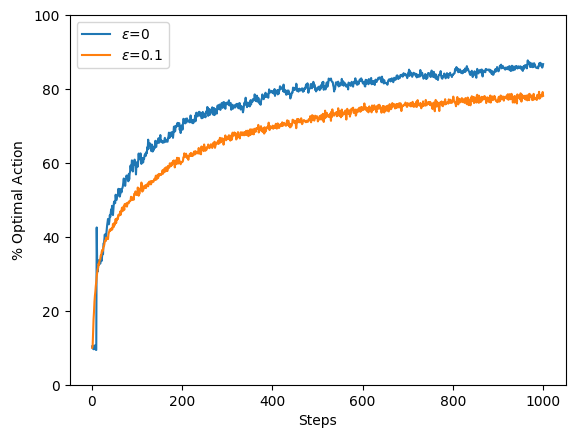

In [23]:
import numpy as np 
import matplotlib.pyplot as plt

k = 10
n_bandits = 2000
time_steps = 1000
mu, sigma = 0, 1

# for plotting graphs
reward_graph = plt.figure(1).gca()
action_graph = plt.figure(2).gca()
x_vals = range(1, time_steps+1)

# true values
Q_star = np.random.normal(mu, sigma, (n_bandits, k))
A_opt = np.argmax(Q_star, 1)

epsilon = [0, 0.1]
for ep in epsilon:
    avg_rewards = []
    opt_act_percentage = []

    # time step 0
    Q = np.zeros((n_bandits, k))
    N = np.zeros((n_bandits, k))
    # avg_rewards.append(0)
    # opt_act_percentage.append(0)

    # time step 1 (each arm is pulled once)
    if (ep==0.1):
        Q1 = np.random.normal(Q_star, sigma)
        # Q = Q1
        N += 1 # arms pulled once
        avg_rewards.append(np.mean(Q1))
        opt_act_percentage.append(1/k*100) # 10% time optimal action is pulled
        st = 2
    else:
        st = 1
    # time step 2-1000
    for t in range(st,time_steps+1):
        print("Running step ", t, "of sample-average method with ep ", ep)
        step_rewards = []
        opt_action_taken = 0
        for i in range(n_bandits):
            if (ep==0.1):
                if (np.random.random() < ep):
                    A = np.random.randint(k)
                else:
                    A = np.argmax(Q[i])
            else:
                A = np.argmax(Q[i] + 2 * np.sqrt(np.log(t)/N[i]))
            R = np.random.normal(Q_star[i][A], sigma)
            step_rewards.append(R)
            N[i][A] += 1
            Q[i][A] = Q[i][A] + (R-Q[i][A])/N[i][A]            
            if (A == A_opt[i]):
                opt_action_taken += 1
        step_average = np.mean(step_rewards)
        avg_rewards.append(step_average)
        opt_act_ratio = opt_action_taken / n_bandits * 100
        opt_act_percentage.append(opt_act_ratio)
    # plot the graphs
    reward_graph.plot(x_vals, avg_rewards)
    action_graph.plot(x_vals, opt_act_percentage)

# labels and legends for the plots
reward_graph.set_ylabel('Average Reward')
reward_graph.set_xlabel('Steps')
reward_graph.legend((r'$\epsilon$='+str(epsilon[0]), r'$\epsilon$='+str(epsilon[1])), loc='best')
action_graph.set_ylabel(r'$\%$ Optimal Action')
action_graph.set_xlabel('Steps')
action_graph.set_ylim(0,100)
action_graph.legend((r'$\epsilon$='+str(epsilon[0]), r'$\epsilon$='+str(epsilon[1])), loc='best')
plt.show()